In [7]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [8]:
%pip install bertopic
%pip install germansentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd
from tqdm import tqdm

from bertopic import BERTopic
from germansentiment import SentimentModel

from google.colab import drive

In [10]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [11]:
#topic_model = BERTopic.load('gdrive/MyDrive/mathesis/topic_model_bertopic_2018')

In [12]:
df = pd.read_pickle('gdrive/MyDrive/mathesis/df_ml_ready_2018.pkl')

In [13]:
topic_df = pd.read_pickle('gdrive/MyDrive/mathesis/df_topic_2018.pkl')

In [14]:
topic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462041 entries, 0 to 1462040
Data columns (total 21 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   window_id                1462041 non-null  int64         
 1   paragraph_id             1462041 non-null  int64         
 2   item_of_business         1462041 non-null  object        
 3   person_id                1222784 non-null  object        
 4   first_name               1222784 non-null  object        
 5   last_name                1222784 non-null  object        
 6   council                  1222784 non-null  object        
 7   party                    1221744 non-null  object        
 8   in_admin_role            1462041 non-null  bool          
 9   text                     1462041 non-null  object        
 10  date                     1462041 non-null  datetime64[ns]
 11  session_title            1462041 non-null  object        
 12  

In [15]:
sent_df = topic_df[(topic_df['person_id'].notnull()) & (topic_df['Topic'] > 0)][['window_id', 'sentences_window']].reset_index(drop=True)

In [16]:
sent_df

,window_id,sentences_window
0,82,Mein besonderer Dank gilt jedoch meiner alles ...
1,83,Schuld an alledem sind natürlich meine stolz h...
2,84,In meinen Dank möchte ich auch alle Personen e...
3,152,Wir schreiten zur Wahl des ersten Vizepräsiden...
4,160,Ich erkläre die Vorgeschlagenen als gewählt un...
...,...,...
362137,1461929,Wir haben Ihre Voten gehört und nehmen sie ern...
362138,1461930,Inhaltlich wurde unsere Meinung im Eingangsvot...
362139,1461931,"Ich versichere Ihnen, dass sich der Bankrat st..."
362140,1461986,Meine Interessenbindung: Ich bin Privatwaldbes...


In [17]:
docs = list(sent_df['sentences_window'])

In [18]:
model = SentimentModel()

In [ ]:
BATCH_SIZE = 50
probabilities = []
for i in tqdm(range(0, len(docs), BATCH_SIZE)):
  probabilities += model.predict_sentiment(docs[i:i + BATCH_SIZE], output_probabilities = True)[1]

100%|██████████| 7243/7243 [1:08:28<00:00,  1.76it/s]


In [ ]:
probabilities[:5]

[[['positive', 0.0038195569068193436],
  ['negative', 0.0040242113173007965],
  ['neutral', 0.9921562671661377]],
 [['positive', 0.002878399332985282],
  ['negative', 0.006498142145574093],
  ['neutral', 0.9906235337257385]],
 [['positive', 0.005786866415292025],
  ['negative', 0.008037479594349861],
  ['neutral', 0.9861757159233093]],
 [['positive', 0.0036735867615789175],
  ['negative', 0.007246747612953186],
  ['neutral', 0.9890796542167664]],
 [['positive', 0.005518804769963026],
  ['negative', 0.010692872107028961],
  ['neutral', 0.9837883710861206]]]

In [ ]:
single_probs = []
for i in probabilities:
  single_probs.append(i[0][1] - i[1][1])
single_probs[:5]

[-0.00020465441048145294,
 -0.003619742812588811,
 -0.0022506131790578365,
 -0.0035731608513742685,
 -0.005174067337065935]

In [ ]:
sent_df['sentiment'] = single_probs

In [ ]:
sent_df

,window_id,sentences_window,sentiment
0,82,Mein besonderer Dank gilt jedoch meiner alles ...,-0.000205
1,83,Schuld an alledem sind natürlich meine stolz h...,-0.003620
2,84,In meinen Dank möchte ich auch alle Personen e...,-0.002251
3,152,Wir schreiten zur Wahl des ersten Vizepräsiden...,-0.003573
4,160,Ich erkläre die Vorgeschlagenen als gewählt un...,-0.005174
...,...,...,...
362137,1461929,Wir haben Ihre Voten gehört und nehmen sie ern...,-0.002874
362138,1461930,Inhaltlich wurde unsere Meinung im Eingangsvot...,-0.000439
362139,1461931,"Ich versichere Ihnen, dass sich der Bankrat st...",-0.000145
362140,1461986,Meine Interessenbindung: Ich bin Privatwaldbes...,-0.005467


<Axes: >

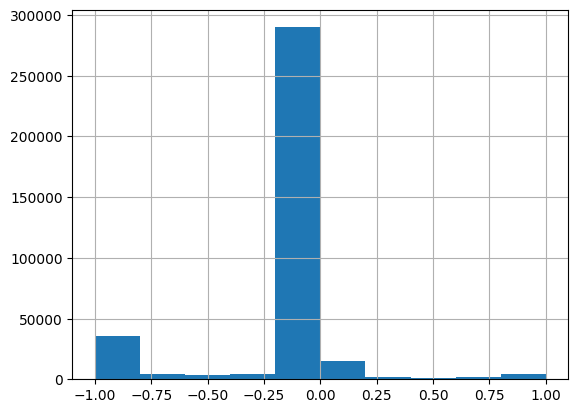

In [ ]:
sent_df['sentiment'].hist()

In [ ]:
sent_df['sentiment'].describe()

count    362142.000000
mean         -0.096795
std           0.320992
min          -0.999499
25%          -0.009891
50%          -0.000586
75%          -0.000004
max           0.999617
Name: sentiment, dtype: float64

In [ ]:
#sent_df.to_pickle('gdrive/MyDrive/mathesis/df_sent_2018.pkl')

## Model evaluation

In [ ]:
test_set = pd.read_pickle('gdrive/MyDrive/mathesis/sent_testset_balanced_2018.pkl')

In [ ]:
test_set

,window_id,sentences_window,true_sentiment
1610,41570,"Ich bedaure etwas, dass wir jetzt im Rahmen de...",-1.0
286,971,Allerdings ist die Anzahl Beissvorfälle bei gl...,-1.0
14584,255402,"Alle Täter haben dies gewusst, Statistiken gef...",-1.0
5906,121969,"Doch was hat dieses Parlament, was hat diese R...",-1.0
11153,195375,"So, jetzt zu meinem Votum: Mit dem Beschluss 3...",-1.0
...,...,...,...
15652,275280,"Und es würde sich auch lohnen, sich diese neue...",1.0
3097,76530,"Und auch im Postulat hat er nochmals gesagt, d...",1.0
13368,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0
4490,91773,Es ist eine Entschädigung und es wird auch wei...,1.0


In [ ]:
test_set = pd.merge(test_set, sent_df, how='inner', on='window_id')

In [ ]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment
0,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,– Überbautes Land: Bei der Ermittlung des Verm...,-8.853663e-07
1,147793,Mit einem Nachtragskredit könnte aufgrund gesi...,-1.0,Diese Gefahr sehen wir und erachten eine solch...,-4.377915e-05
2,183772,Wir sind sehr wohl am Klimaschutz interessiert...,-0.5,Dagegen ist nichts einzuwenden. Nur hat dies m...,-8.497044e-04
3,246919,"Entschuldigung, ich komme noch einmal, mir feh...",-0.5,Man kann also nicht einfach kommen und die Abs...,-8.420615e-03
4,138323,Und – das wurde am Schluss noch angedeutet – d...,-0.5,Ich betreibe seit bald 30 Jahren Orientierungs...,7.175935e-03
5,158271,Hier hätte die Politik bei der Bewilligung der...,-0.5,Es geht um die Offizielle Gesetzessammlung (OS...,-5.559436e-07
6,258798,"Und man muss sehen, wenn man das Einzugsgebiet...",-0.5,"Ich bin mir gar nicht so sicher, ob das absehb...",-6.543416e-03
7,237,Eine Fallübergabe kann zu unnötigen Zeit- und ...,0.0,"Leuthold Theo (SVP, Volketswil) 4. Mossdorf M...",-4.913895e-03
8,172659,In medizinischer Hinsicht hat sich einiges get...,0.0,Ein zweites Kriterium ist die Effizienz. Auch ...,3.078044e-07
9,36021,"Darum öffnen Sie Ihre Ohren, Kolleginnen und K...",0.0,"Er muss weiter das PBG 1991 anwenden, welches ...",-3.868719e-04


In [ ]:
test_set['error'] = abs(test_set['true_sentiment'] - test_set['sentiment'])
test_set['error_sq'] = (test_set['true_sentiment'] - test_set['sentiment'])**2

In [ ]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq
0,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,– Überbautes Land: Bei der Ermittlung des Verm...,-8.853663e-07,9.999991e-01,9.999982e-01
1,147793,Mit einem Nachtragskredit könnte aufgrund gesi...,-1.0,Diese Gefahr sehen wir und erachten eine solch...,-4.377915e-05,9.999562e-01,9.999124e-01
2,183772,Wir sind sehr wohl am Klimaschutz interessiert...,-0.5,Dagegen ist nichts einzuwenden. Nur hat dies m...,-8.497044e-04,4.991503e-01,2.491510e-01
3,246919,"Entschuldigung, ich komme noch einmal, mir feh...",-0.5,Man kann also nicht einfach kommen und die Abs...,-8.420615e-03,4.915794e-01,2.416503e-01
4,138323,Und – das wurde am Schluss noch angedeutet – d...,-0.5,Ich betreibe seit bald 30 Jahren Orientierungs...,7.175935e-03,5.071759e-01,2.572274e-01
5,158271,Hier hätte die Politik bei der Bewilligung der...,-0.5,Es geht um die Offizielle Gesetzessammlung (OS...,-5.559436e-07,4.999994e-01,2.499994e-01
6,258798,"Und man muss sehen, wenn man das Einzugsgebiet...",-0.5,"Ich bin mir gar nicht so sicher, ob das absehb...",-6.543416e-03,4.934566e-01,2.434994e-01
7,237,Eine Fallübergabe kann zu unnötigen Zeit- und ...,0.0,"Leuthold Theo (SVP, Volketswil) 4. Mossdorf M...",-4.913895e-03,4.913895e-03,2.414636e-05
8,172659,In medizinischer Hinsicht hat sich einiges get...,0.0,Ein zweites Kriterium ist die Effizienz. Auch ...,3.078044e-07,3.078044e-07,9.474354e-14
9,36021,"Darum öffnen Sie Ihre Ohren, Kolleginnen und K...",0.0,"Er muss weiter das PBG 1991 anwenden, welches ...",-3.868719e-04,3.868719e-04,1.496699e-07


### Mean absolute error

In [ ]:
test_set['error'].mean()

0.45169364428786846

### Mean squared error

In [ ]:
test_set['error_sq'].mean()

0.31345046255691184

In [ ]:
test_set.sort_values(by='error', ascending=False)

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq
17,229915,"Es ist ein Minergie-A-eco-Bauwerk, wir können ...",1.0,Der Regierungsrat hat in der Zwischenzeit gele...,-4.453990e-03,1.004454e+00,1.008928e+00
0,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,– Überbautes Land: Bei der Ermittlung des Verm...,-8.853663e-07,9.999991e-01,9.999982e-01
1,147793,Mit einem Nachtragskredit könnte aufgrund gesi...,-1.0,Diese Gefahr sehen wir und erachten eine solch...,-4.377915e-05,9.999562e-01,9.999124e-01
16,257832,Dann bin ich natürlich auch froh um das Votum ...,1.0,Klasse tönt schön. Die Erfahrungen damit sind ...,3.898858e-01,6.101142e-01,3.722393e-01
13,214553,"Es erfüllt den Standard «SNBS», «Standard Nach...",0.5,Wir haben just deswegen eine Motion hier im Ra...,-1.908115e-02,5.190812e-01,2.694452e-01
4,138323,Und – das wurde am Schluss noch angedeutet – d...,-0.5,Ich betreibe seit bald 30 Jahren Orientierungs...,7.175935e-03,5.071759e-01,2.572274e-01
15,73570,"Wenn man den Technikfans zuhört, die über Bloc...",0.5,Autolenken darf man schon seit Menschengedenke...,-2.530192e-05,5.000253e-01,2.500253e-01
14,224919,"Wir waren nie eine Billigdestination, wir woll...",0.5,Der Umbau allein kostete am Kollegiengebäude 4...,-6.150797e-06,5.000062e-01,2.500062e-01
12,101060,In den Zeiten des gesellschaftlichen Wandels b...,0.5,"Und Sie kommen nun mit dem Faktor 2,05? Dabei ...",-1.886580e-06,5.000019e-01,2.500019e-01
5,158271,Hier hätte die Politik bei der Bewilligung der...,-0.5,Es geht um die Offizielle Gesetzessammlung (OS...,-5.559436e-07,4.999994e-01,2.499994e-01


In [ ]:
test_set['sentiment*2'] = test_set['sentiment']*2
test_set['sentiment_cat'] = test_set['sentiment*2'].round() / 2

In [ ]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq,sentiment*2,sentiment_cat
0,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,– Überbautes Land: Bei der Ermittlung des Verm...,-8.853663e-07,9.999991e-01,9.999982e-01,-1.770733e-06,-0.0
1,147793,Mit einem Nachtragskredit könnte aufgrund gesi...,-1.0,Diese Gefahr sehen wir und erachten eine solch...,-4.377915e-05,9.999562e-01,9.999124e-01,-8.755830e-05,-0.0
2,183772,Wir sind sehr wohl am Klimaschutz interessiert...,-0.5,Dagegen ist nichts einzuwenden. Nur hat dies m...,-8.497044e-04,4.991503e-01,2.491510e-01,-1.699409e-03,-0.0
3,246919,"Entschuldigung, ich komme noch einmal, mir feh...",-0.5,Man kann also nicht einfach kommen und die Abs...,-8.420615e-03,4.915794e-01,2.416503e-01,-1.684123e-02,-0.0
4,138323,Und – das wurde am Schluss noch angedeutet – d...,-0.5,Ich betreibe seit bald 30 Jahren Orientierungs...,7.175935e-03,5.071759e-01,2.572274e-01,1.435187e-02,0.0
5,158271,Hier hätte die Politik bei der Bewilligung der...,-0.5,Es geht um die Offizielle Gesetzessammlung (OS...,-5.559436e-07,4.999994e-01,2.499994e-01,-1.111887e-06,-0.0
6,258798,"Und man muss sehen, wenn man das Einzugsgebiet...",-0.5,"Ich bin mir gar nicht so sicher, ob das absehb...",-6.543416e-03,4.934566e-01,2.434994e-01,-1.308683e-02,-0.0
7,237,Eine Fallübergabe kann zu unnötigen Zeit- und ...,0.0,"Leuthold Theo (SVP, Volketswil) 4. Mossdorf M...",-4.913895e-03,4.913895e-03,2.414636e-05,-9.827789e-03,-0.0
8,172659,In medizinischer Hinsicht hat sich einiges get...,0.0,Ein zweites Kriterium ist die Effizienz. Auch ...,3.078044e-07,3.078044e-07,9.474354e-14,6.156088e-07,0.0
9,36021,"Darum öffnen Sie Ihre Ohren, Kolleginnen und K...",0.0,"Er muss weiter das PBG 1991 anwenden, welches ...",-3.868719e-04,3.868719e-04,1.496699e-07,-7.737438e-04,-0.0


In [ ]:
def confusion_matrix(df: pd.DataFrame, col1: str, col2: str):
    """
    Given a dataframe with at least
    two categorical columns, create a 
    confusion matrix of the count of the columns
    cross-counts
    
    use like:
    
    >>> confusion_matrix(test_df, 'actual_label', 'predicted_label')
    """
    return (
            df
            .groupby([col1, col2])
            .size()
            .unstack(fill_value=0)
            )

In [ ]:
confusion_matrix(test_set, 'true_sentiment', 'sentiment_cat')

sentiment_cat,-0.0,0.5
true_sentiment,,
-1.0,2,0
-0.5,5,0
0.0,5,0
0.5,4,0
1.0,1,1


In [ ]:
test_set['true_sentiment_3'] = np.where(test_set['true_sentiment'] % 1 == 0.5, test_set['true_sentiment'] * 2, test_set['true_sentiment'])
test_set['sentiment_cat_3'] = np.where(test_set['sentiment_cat'] % 1 == 0.5, test_set['sentiment_cat'] * 2, test_set['sentiment_cat'])

In [ ]:
test_set

,window_id,sentences_window_x,true_sentiment,sentences_window_y,sentiment,error,error_sq,sentiment*2,sentiment_cat,true_sentiment_3,sentiment_cat_3
0,99193,Würden wir in diesem 2 Schneckentempo weiterm...,-1.0,– Überbautes Land: Bei der Ermittlung des Verm...,-8.853663e-07,9.999991e-01,9.999982e-01,-1.770733e-06,-0.0,-1.0,-0.0
1,147793,Mit einem Nachtragskredit könnte aufgrund gesi...,-1.0,Diese Gefahr sehen wir und erachten eine solch...,-4.377915e-05,9.999562e-01,9.999124e-01,-8.755830e-05,-0.0,-1.0,-0.0
2,183772,Wir sind sehr wohl am Klimaschutz interessiert...,-0.5,Dagegen ist nichts einzuwenden. Nur hat dies m...,-8.497044e-04,4.991503e-01,2.491510e-01,-1.699409e-03,-0.0,-1.0,-0.0
3,246919,"Entschuldigung, ich komme noch einmal, mir feh...",-0.5,Man kann also nicht einfach kommen und die Abs...,-8.420615e-03,4.915794e-01,2.416503e-01,-1.684123e-02,-0.0,-1.0,-0.0
4,138323,Und – das wurde am Schluss noch angedeutet – d...,-0.5,Ich betreibe seit bald 30 Jahren Orientierungs...,7.175935e-03,5.071759e-01,2.572274e-01,1.435187e-02,0.0,-1.0,0.0
5,158271,Hier hätte die Politik bei der Bewilligung der...,-0.5,Es geht um die Offizielle Gesetzessammlung (OS...,-5.559436e-07,4.999994e-01,2.499994e-01,-1.111887e-06,-0.0,-1.0,-0.0
6,258798,"Und man muss sehen, wenn man das Einzugsgebiet...",-0.5,"Ich bin mir gar nicht so sicher, ob das absehb...",-6.543416e-03,4.934566e-01,2.434994e-01,-1.308683e-02,-0.0,-1.0,-0.0
7,237,Eine Fallübergabe kann zu unnötigen Zeit- und ...,0.0,"Leuthold Theo (SVP, Volketswil) 4. Mossdorf M...",-4.913895e-03,4.913895e-03,2.414636e-05,-9.827789e-03,-0.0,0.0,-0.0
8,172659,In medizinischer Hinsicht hat sich einiges get...,0.0,Ein zweites Kriterium ist die Effizienz. Auch ...,3.078044e-07,3.078044e-07,9.474354e-14,6.156088e-07,0.0,0.0,0.0
9,36021,"Darum öffnen Sie Ihre Ohren, Kolleginnen und K...",0.0,"Er muss weiter das PBG 1991 anwenden, welches ...",-3.868719e-04,3.868719e-04,1.496699e-07,-7.737438e-04,-0.0,0.0,-0.0


In [ ]:
confusion_matrix(test_set, 'true_sentiment_3', 'sentiment_cat_3')

sentiment_cat_3,-0.0,1.0
true_sentiment_3,,
-1.0,7,0
0.0,5,0
1.0,5,1
